In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel('IMB821_for_students.xlsx',sheet_name ='raw_data')
df

,Financial Year,Bag Number,Status Description,Blood Group,RH,Blood Classification,Stock Creation Date,Stock Issue Date,Expiry Date
0,2017-2018,112PR,Issued,A,POSITIVE,PACKED RED CELLS,2018-01-01,2018-01-03,2018-02-09
1,2017-2018,118PR,Issued,A,POSITIVE,PACKED RED CELLS,2017-12-31,2017-12-31,2018-01-29
2,2017-2018,163PR,Issued,O,POSITIVE,PACKED RED CELLS,2018-03-27,2018-03-31,2018-05-07
3,2017-2018,7728PL,Issued,B,POSITIVE,PLASMA,2017-10-02,2017-10-22,2018-10-02
4,2017-2018,7728CY,Expired,B,POSITIVE,CRYO,2017-10-02,NaT,2018-10-02
...,...,...,...,...,...,...,...,...,...
40828,2018-2019,8927PR,Expired,B,POSITIVE,PACKED RED CELLS,2018-09-28,NaT,2018-11-08
40829,2018-2019,8936PR,Expired,AB,POSITIVE,PACKED RED CELLS,2018-09-30,NaT,2018-11-10
40830,2018-2019,8938PR,Expired,O,POSITIVE,PACKED RED CELLS,2018-09-30,NaT,2018-11-10
40831,2018-2019,8952,Expired,A,POSITIVE,WHOLE BLOOD,2018-09-30,NaT,2018-11-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Financial Year        40833 non-null  object        
 1   Bag Number            40833 non-null  object        
 2   Status Description    40833 non-null  object        
 3   Blood Group           40833 non-null  object        
 4   RH                    40833 non-null  object        
 5   Blood Classification  40833 non-null  object        
 6   Stock Creation Date   40833 non-null  datetime64[ns]
 7   Stock Issue Date      35249 non-null  datetime64[ns]
 8   Expiry Date           40830 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(6)
memory usage: 2.8+ MB


In [7]:
df.isna().sum()

Financial Year          0
Bag Number              0
Status Description      0
Blood Group             0
RH                      0
Blood Classification    0
Stock Creation Date     0
Stock Issue Date        0
Expiry Date             3
dtype: int64

In [8]:
# Drop rows with null values in the 'Stock Issue Date' column
df.dropna(subset=['Stock Issue Date'], inplace=True)

In [9]:
df.isna().sum()

Financial Year          0
Bag Number              0
Status Description      0
Blood Group             0
RH                      0
Blood Classification    0
Stock Creation Date     0
Stock Issue Date        0
Expiry Date             3
dtype: int64

In [10]:
# Extract year and week
df['Year'] = df['Stock Issue Date'].dt.year
df['Week'] = df['Stock Issue Date'].dt.isocalendar().week

In [11]:
df

,Financial Year,Bag Number,Status Description,Blood Group,RH,Blood Classification,Stock Creation Date,Stock Issue Date,Expiry Date,Year,Week
0,2017-2018,112PR,Issued,A,POSITIVE,PACKED RED CELLS,2018-01-01,2018-01-03,2018-02-09,2018,1
1,2017-2018,118PR,Issued,A,POSITIVE,PACKED RED CELLS,2017-12-31,2017-12-31,2018-01-29,2017,52
2,2017-2018,163PR,Issued,O,POSITIVE,PACKED RED CELLS,2018-03-27,2018-03-31,2018-05-07,2018,13
3,2017-2018,7728PL,Issued,B,POSITIVE,PLASMA,2017-10-02,2017-10-22,2018-10-02,2017,42
5,2017-2018,7730PL,Issued,B,POSITIVE,PLASMA,2017-10-02,2017-10-22,2018-10-02,2017,42
...,...,...,...,...,...,...,...,...,...,...,...
39747,2018-2019,8938PT,Issued,O,POSITIVE,PLATELETS,2018-09-30,2018-09-30,2018-10-06,2018,39
39748,2018-2019,8940PR,Issued,B,POSITIVE,PACKED RED CELLS,2018-09-30,2018-10-07,2018-11-10,2018,40
39749,2018-2019,8945PR,Issued,O,POSITIVE,PACKED RED CELLS,2018-09-30,2018-10-07,2018-11-10,2018,40
39750,2018-2019,8946PR,Issued,B,POSITIVE,PACKED RED CELLS,2018-09-30,2018-10-07,2018-11-10,2018,40


In [12]:
# Calculate the weekly demand for each blood component
weekly_demand = df.groupby(['Blood Classification','Year','Week']).size().reset_index(name='Demand')
weekly_demand

,Blood Classification,Year,Week,Demand
0,CRYO,2017,42,1
1,CRYO,2017,47,2
2,CRYO,2017,51,3
3,CRYO,2017,52,2
4,CRYO,2018,1,3
...,...,...,...,...
262,WHOLE BLOOD,2018,36,30
263,WHOLE BLOOD,2018,37,15
264,WHOLE BLOOD,2018,38,20
265,WHOLE BLOOD,2018,39,35


In [13]:
df['Blood Classification'].unique()

array(['PACKED RED CELLS', 'PLASMA', 'WHOLE BLOOD', 'CRYO',
       'FRESH FROZEN PLASMA', 'PLATELETS', 'SINGLE DONOR PLATELET'],
      dtype=object)

In [14]:
# Defining blood component types
blood_types = ['PLASMA','PACKED RED CELLS','CRYO','FRESH FROZEN PLASMA','PLATELETS','WHOLE BLOOD']

In [15]:
# Initialize an empty DataFrame
data_filtered_combined = pd.DataFrame()

In [16]:
for blood_type in blood_types:
    # Filter data and directly append it to data_filtered_combined
    data_filtered_combined = pd.concat([data_filtered_combined, weekly_demand[weekly_demand['Blood Classification'] == blood_type]])

In [17]:
# Reset Index
data_filtered_combined.reset_index(drop=True, inplace=True)
data_filtered_combined

,Blood Classification,Year,Week,Demand
0,PLASMA,2017,42,100
1,PLASMA,2017,52,111
2,PLASMA,2018,16,114
3,PLASMA,2018,33,10
4,PLASMA,2018,37,5
...,...,...,...,...
232,WHOLE BLOOD,2018,36,30
233,WHOLE BLOOD,2018,37,15
234,WHOLE BLOOD,2018,38,20
235,WHOLE BLOOD,2018,39,35


In [18]:
# Find the week of 2017-10-09
train_start_time = '2017-10-09'
specific_week_info = df[df['Stock Issue Date'] == train_start_time]
specific_week_info.head(1)

,Financial Year,Bag Number,Status Description,Blood Group,RH,Blood Classification,Stock Creation Date,Stock Issue Date,Expiry Date,Year,Week
192,2017-2018,8031PT,Issued,B,POSITIVE,PLATELETS,2017-10-06,2017-10-09,2017-10-12,2017,41


In [19]:
# Find the week of 2018-07-28
train_end_time = '2018-07-28'
specific_week_info = df[df['Stock Issue Date'] == train_end_time]
specific_week_info.head(1)

,Financial Year,Bag Number,Status Description,Blood Group,RH,Blood Classification,Stock Creation Date,Stock Issue Date,Expiry Date,Year,Week
25527,2018-2019,3311FP,Issued,A,POSITIVE,FRESH FROZEN PLASMA,2018-06-17,2018-07-28,2019-06-17,2018,30


In [20]:
# Find the week of 2018-07-29
test_start_time = '2018-07-29'
specific_week_info = df[df['Stock Issue Date'] == test_start_time]
specific_week_info.head(1)

,Financial Year,Bag Number,Status Description,Blood Group,RH,Blood Classification,Stock Creation Date,Stock Issue Date,Expiry Date,Year,Week
27350,2018-2019,4104PR,Issued,O,POSITIVE,PACKED RED CELLS,2018-07-04,2018-07-29,2018-09-04,2018,30


In [21]:
# Find the week of 2018-09-29
test_end_time = '2018-09-29'
specific_week_info = df[df['Stock Issue Date'] == test_end_time]
specific_week_info.head(1)

,Financial Year,Bag Number,Status Description,Blood Group,RH,Blood Classification,Stock Creation Date,Stock Issue Date,Expiry Date,Year,Week
33199,2018-2019,6745PR,Issued,B,POSITIVE,PACKED RED CELLS,2018-08-24,2018-09-29,2018-10-03,2018,39


In [22]:
# Split into training and testing sets
train_weeks = data_filtered_combined[((data_filtered_combined['Year'] == 2017)& (data_filtered_combined['Week'] >= 41) | 
                                      (data_filtered_combined['Year'] == 2018)) & (data_filtered_combined['Week'] <= 30)]

test_weeks = data_filtered_combined[(data_filtered_combined['Year'] == 2018) & (data_filtered_combined['Week'] > 30) | 
                                    (data_filtered_combined['Year'] == 2018) & (data_filtered_combined['Week'] <= 39)]

In [23]:
# Split data
X_train = train_weeks[['Year', 'Week']]
y_train = train_weeks['Demand']
X_test = test_weeks[['Year', 'Week']]
y_test = test_weeks['Demand']

In [66]:
# Training K-nearest neighbor regression model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [67]:
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
rmse_knn

297.0245584532099

In [68]:
mape_knn = np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100
mape_knn

512.7659912232025

In [27]:
# Visualize the relationship between K-value and MAPE and RMSE
k_values = range(1, 11)
mape_values = []
rmse_values = []

In [28]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    mape = np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    mape_values.append(mape)
    rmse_values.append(rmse)

In [30]:
import matplotlib.pyplot as plt

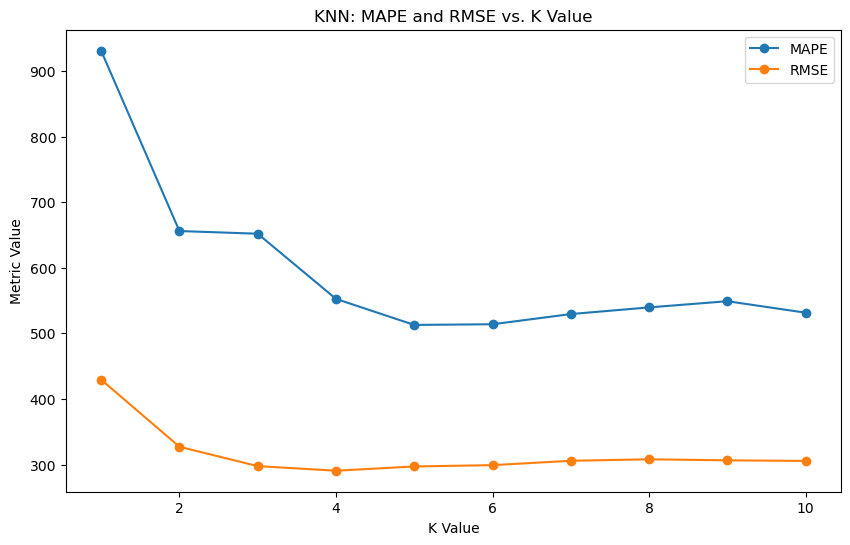

In [31]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(k_values, mape_values, marker='o', label='MAPE')
plt.plot(k_values, rmse_values, marker='o', label='RMSE')
plt.title('KNN: MAPE and RMSE vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

As the K value increases, performance may improve until a certain K value stabilizes the model performance. This inflection point corresponds to the k value we need.

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [70]:
# Decision Tree Regression
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [71]:
mape_tree = np.mean(np.abs((y_test - y_pred_tree) / y_test)) * 100
mape_tree

488.10572777926114

In [72]:
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
rmse_tree

289.45747130397876

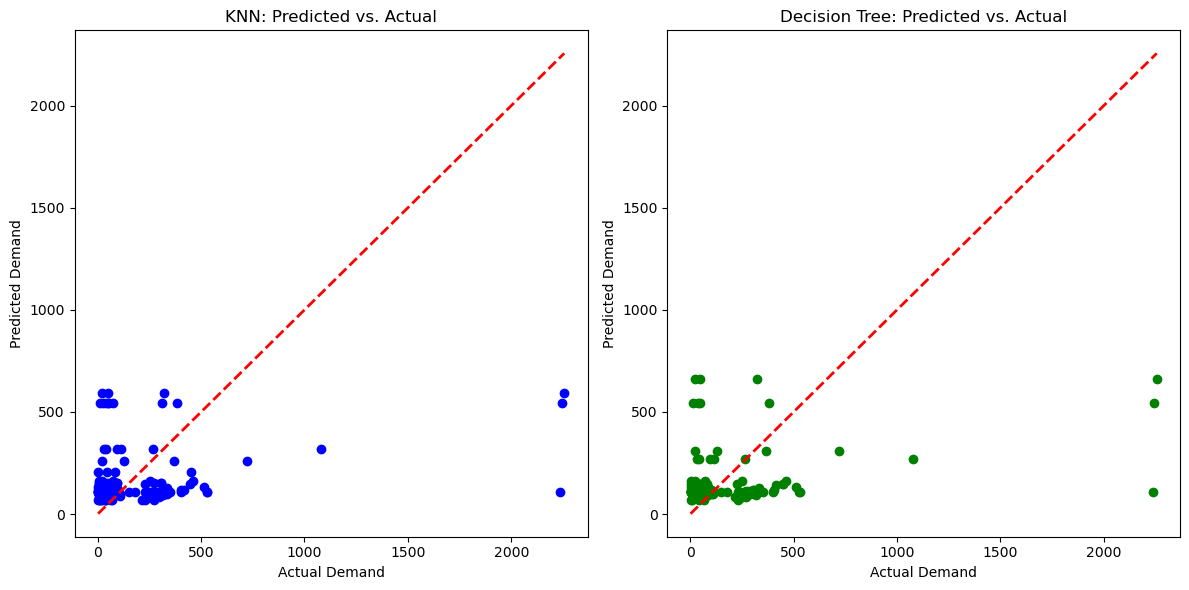

In [82]:
# Visualize the predicted vs. actual values for both models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('KNN: Predicted vs. Actual')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Decision Tree: Predicted vs. Actual')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

plt.tight_layout()
plt.show()

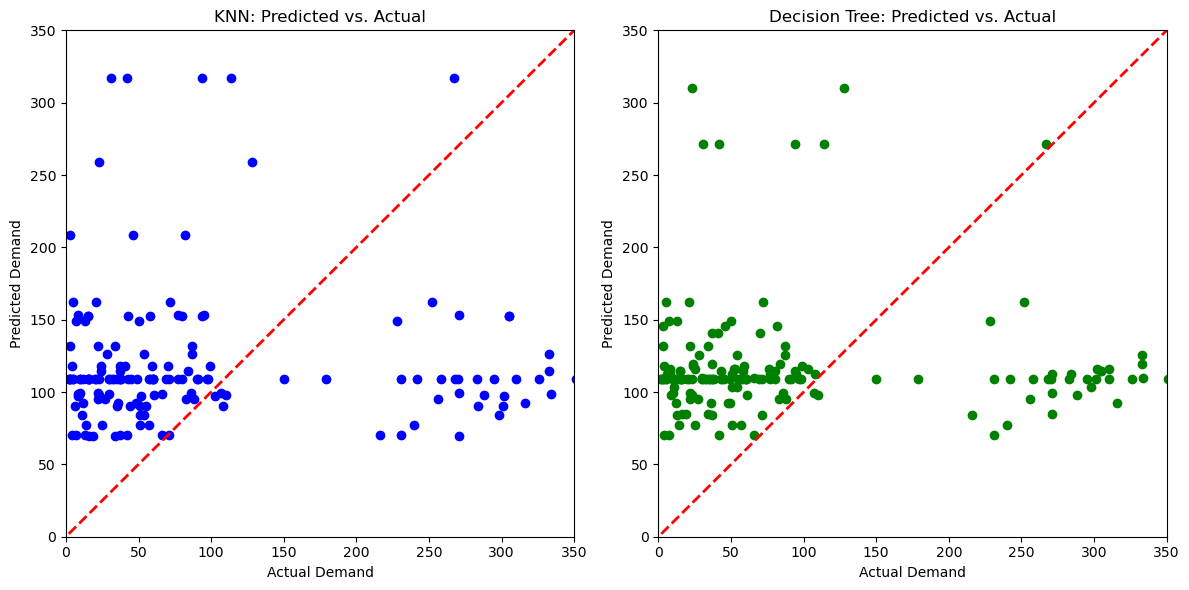

In [89]:
# Zoom in the area where scattered points gather for analysis
# Range for x/y is 0 - 350

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.ylim(0, 350)
plt.xlim(0, 350)
plt.title('KNN: Predicted vs. Actual')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree, color='green')
plt.ylim(0, 350)
plt.xlim(0, 350)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.title('Decision Tree: Predicted vs. Actual')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

plt.tight_layout()
plt.show()

We can see that the scatter points of the decision tree revolve more around the dashed line.

In [79]:
# Compare two model
print(f'KNN MAPE: {mape_knn:.2f}%, RMSE: {rmse_knn:.2f}')
print(f'TREE MAPE: {mape_tree:.2f}%, RMSE: {rmse_tree:.2f}')

KNN MAPE: 512.77%, RMSE: 297.02
TREE MAPE: 488.11%, RMSE: 289.46


MAPE is used to measure prediction accuracy. The lower the MAPE, the higher the prediction accuracy of the model.
The decision tree model is slightly better than the KNN model.

Compared to MAPE, RMSE imposes higher penalties for large errors and provides a standard measure of error. The lower the RMSE value, the better the predictive performance of the model.
The decision tree model is also slightly better than the KNN model.

According to scatter plot and calculation, we need to choose Decision Tree Regression model.
